Rotated Image Dimensions: 5816x5753


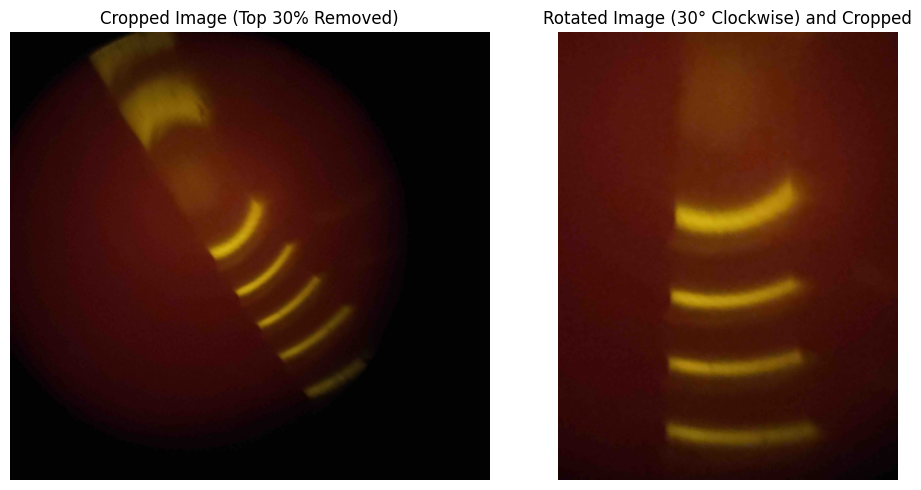

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
image = cv2.imread('images/pattern_0.jpg')

# Crop the top 30% of the image
height, width = image.shape[:2]
crop_height = int(0.3 * height)  # Calculate the height to crop
cropped_image = image[crop_height:, :]  # Crop from 30% to the bottom

# Rotate the image clockwise by 30 degrees
angle = -36  # Negative angle for clockwise rotation
center = (width // 2, (height - crop_height) // 2)  # Center of rotation
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1.0)

# Calculate the new bounding dimensions of the rotated image
cos = np.abs(rotation_matrix[0, 0])
sin = np.abs(rotation_matrix[0, 1])
new_width = int((height - crop_height) * sin + width * cos)
new_height = int((height - crop_height) * cos + width * sin)

# Adjust the rotation matrix to account for translation
rotation_matrix[0, 2] += (new_width / 2) - center[0]
rotation_matrix[1, 2] += (new_height / 2) - center[1]

# Perform the rotation
rotated_image = cv2.warpAffine(cropped_image, rotation_matrix, (new_width, new_height))
new_height, new_width = rotated_image.shape[:2]
print(f'Rotated Image Dimensions: {new_width}x{new_height}')
rotated_image = rotated_image[int(new_height*0.3):int(new_height*0.7), int(new_width*0.35):int(new_width*0.65)]

# Display the images
plt.figure(figsize=(10, 5))

# Cropped Image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image (Top 30% Removed)')
plt.axis('off')

# Rotated Image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image (30° Clockwise) and Cropped')
plt.axis('off')

plt.tight_layout()
plt.show()


## Convert to grayscale

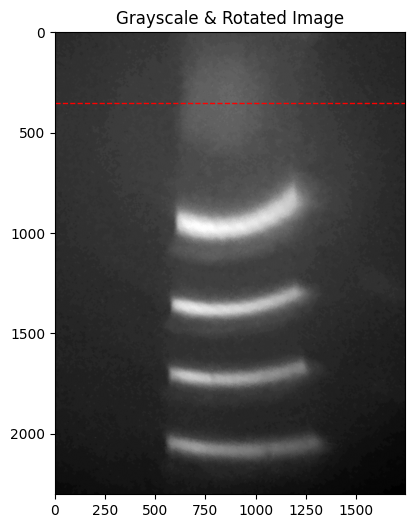

In [ ]:
# Convert rotated image to grayscale
gray_image = cv2.cvtColor(rotated_image, cv2.COLOR_BGR2GRAY)
print(gray_image.)

# Plot the grayscale image
plt.figure(figsize=(5, 6))
plt.imshow(gray_image, cmap='gray')
plt.axhline(y=350, color='r', linestyle='--', linewidth=1)
plt.title('Grayscale & Rotated Image')
plt.savefig('gray_rotated_image.png')

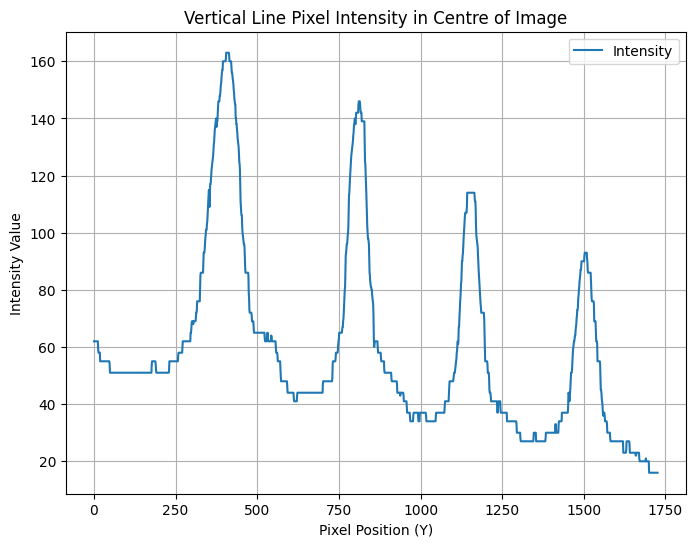

In [7]:

# Load the image in grayscale

# Get the middle column (vertical line)
middle_column = gray_image[int(gray_image.shape[0] / 4):, 800]

# Plot the intensity values
plt.figure(figsize=(8, 6))
plt.plot(middle_column, label='Intensity')
plt.title('Vertical Line Pixel Intensity in Centre of Image')
plt.xlabel('Pixel Position (Y)')
plt.ylabel('Intensity Value')
plt.legend()
plt.grid()
plt.show()

## Peak analysis

[ 409  812 1154 1506]


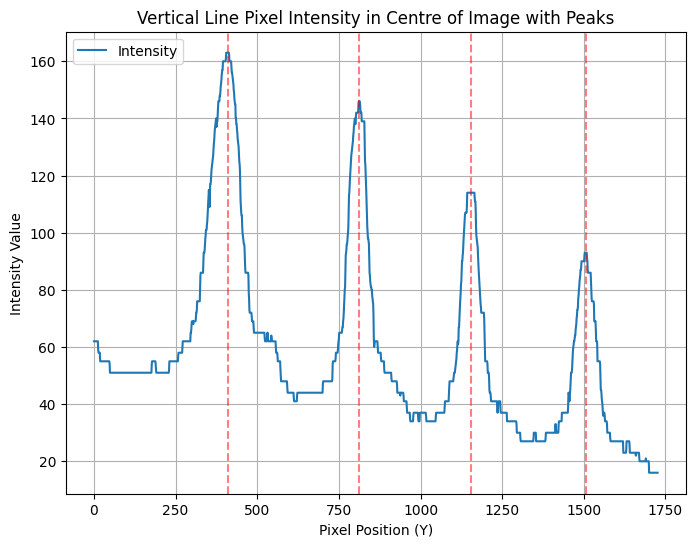

In [18]:
from scipy.signal import find_peaks

# Find the peaks in the intensity values
peaks, _ = find_peaks(middle_column, height=80, prominence=20)
print(peaks)

# Plot the intensity values with peaks
plt.figure(figsize=(8, 6))
plt.plot(middle_column, label='Intensity')
plt.title('Vertical Line Pixel Intensity in Centre of Image with Peaks')
plt.xlabel('Pixel Position (Y)')
plt.ylabel('Intensity Value')
for peak in peaks:
    plt.axvline(x=peak, color='red', linestyle='--', alpha=0.5)
plt.legend()
plt.grid()

a=2789854.7999999993, b=-2548259.999999997


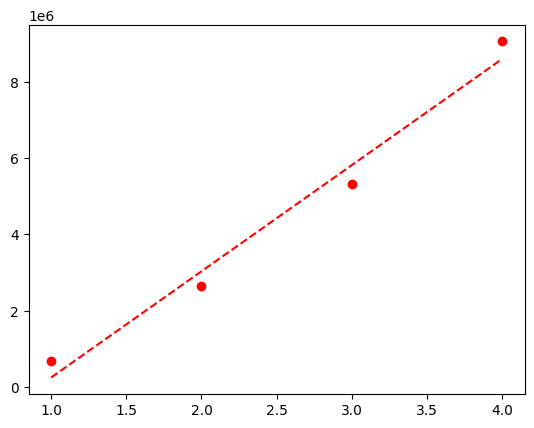

In [32]:
plt.plot([1,2,3,4], 4*peaks**2, 'ro')
# fit a linear curve an estimate its y-values and their error.
x = np.array([1, 2, 3, 4])
y = 4*peaks**2
a,b = np.polyfit(x, y, 1)
y_est = a * x + b
print(f'a={a}, b={b}')
plt.plot(x,y_est,"r--")